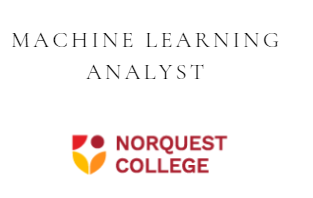

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading the dataset for the year 2023
data = pd.read_csv('Islamic_Food_Drive_cleaned_data.csv')
data.head()

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Special_Event,Day,weekend_or_weekday,Year,Age_group
0,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-09-07 3:00,2023-09-07 17:37,Abdulhalim's Hamper,No Special Event,Thursday,Weekday,2023,20-40
1,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07 4:00,2023-11-07 15:59,Abdulhalim's Hamper,No Special Event,Tuesday,Weekday,2023,20-40
2,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16 4:00,2023-11-16 17:04,Food Hamper pickup,No Special Event,Thursday,Weekday,2023,20-40
3,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16 3:00,2024-04-17 15:25,Food Hamper pickup,No Special Event,Wednesday,Weekday,2024,20-40
4,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-09-12 3:00,2023-09-12 17:39,Sadek's Hamper,No Special Event,Tuesday,Weekday,2023,20-40


In [ ]:
import pandas as pd

# Convert the 'collect_scheduled_date' column to datetime format
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'], errors='coerce')

# Extract the hour from the datetime column
data['Pickup_date'] = data['Pickup_date'].dt.date

# Display the updated dataframe
data[['Pickup_date']].head()

,Pickup_date
0,2023-09-07
1,2023-11-07
2,2023-11-16
3,2024-04-17
4,2023-09-12


In [ ]:
import pandas as pd
# Filter data between November 2023 and August 2024 in the pickup date
start_date = pd.to_datetime('2023-11-01')
end_date = pd.to_datetime('2024-08-31')

# Convert 'Pickup_date' to Timestamp objects for consistent comparison
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'])

data = data[(data['Pickup_date'] >= start_date) & (data['Pickup_date'] <= end_date)]

# Now, filtered_data contains only the rows where the pickup date falls within the specified range.
print(data.head())


                                             Address  Family_size  \
1       14604 77 St NW, Edmonton, AB T5C 1E8, Canada            6   
2       14604 77 St NW, Edmonton, AB T5C 1E8, Canada            6   
3       14604 77 St NW, Edmonton, AB T5C 1E8, Canada            6   
5  403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada            5   
6  403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada            5   

                          Family_id  Status                         client_id  \
1  1695130035510x822223160822795600  Active  1694115474357x134699341188431870   
2  1695130035510x822223160822795600  Active  1694115474357x134699341188431870   
3  1695130035510x822223160822795600  Active  1694115474357x134699341188431870   
5  1695130035707x891534858657611300  Active  1694547419532x515953499649605600   
6  1695130035707x891534858657611300  Active  1694547419532x515953499649605600   

  collect_scheduled_date Pickup_date                Title     Special_Event  \
1        2023-11-07

In [ ]:
import pandas as pd

# Convert the 'collect_scheduled_date' column to datetime format
data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'], errors='coerce')

# Extract the hour from the datetime column
data['collect_scheduled_date'] = data['collect_scheduled_date'].dt.date

# Display the updated dataframe
data[['collect_scheduled_date']].head()

,collect_scheduled_date
1,2023-11-07
2,2023-11-16
3,2024-04-16
5,2023-11-20
6,2023-12-20


In [ ]:
data.head()

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Special_Event,Day,weekend_or_weekday,Year,Age_group
1,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,No Special Event,Tuesday,Weekday,2023,20-40
2,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16,2023-11-16,Food Hamper pickup,No Special Event,Thursday,Weekday,2023,20-40
3,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16,2024-04-17,Food Hamper pickup,No Special Event,Wednesday,Weekday,2024,20-40
5,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-11-20,2023-11-20,Food Hamper,No Special Event,Monday,Weekday,2023,20-40
6,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-12-20,2023-12-20,Food Hamper,No Special Event,Wednesday,Weekday,2023,20-40


In [ ]:
data.shape

(6259, 13)

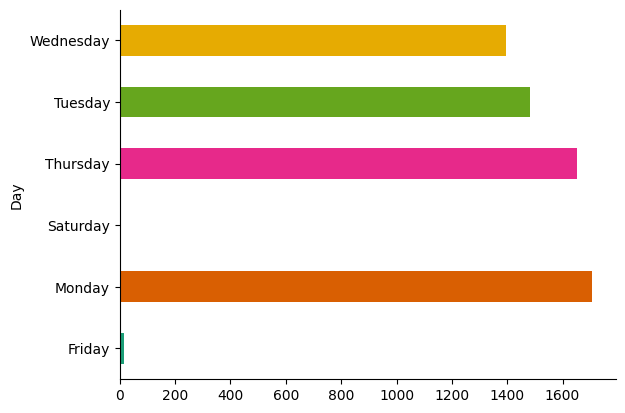

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd
# Filter data between November 2023 and August 2024 in the pickup date
start_date = pd.to_datetime('2023-11-01')
end_date = pd.to_datetime('2024-08-31')

# Convert 'Pickup_date' to Timestamp objects for consistent comparison
data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'])

data = data[(data['collect_scheduled_date'] >= start_date) & (data['collect_scheduled_date'] <= end_date)]

# Now, filtered_data contains only the rows where the pickup date falls within the specified range.
print(data.head())

                                             Address  Family_size  \
1       14604 77 St NW, Edmonton, AB T5C 1E8, Canada            6   
2       14604 77 St NW, Edmonton, AB T5C 1E8, Canada            6   
3       14604 77 St NW, Edmonton, AB T5C 1E8, Canada            6   
5  403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada            5   
6  403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada            5   

                          Family_id  Status                         client_id  \
1  1695130035510x822223160822795600  Active  1694115474357x134699341188431870   
2  1695130035510x822223160822795600  Active  1694115474357x134699341188431870   
3  1695130035510x822223160822795600  Active  1694115474357x134699341188431870   
5  1695130035707x891534858657611300  Active  1694547419532x515953499649605600   
6  1695130035707x891534858657611300  Active  1694547419532x515953499649605600   

  collect_scheduled_date Pickup_date                Title     Special_Event  \
1             2023-

In [ ]:
data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'], errors='coerce')

# Now the groupby and to_period should work
monthly_pickups = data.groupby(data['collect_scheduled_date'].dt.to_period('M'))['collect_scheduled_date'].count()

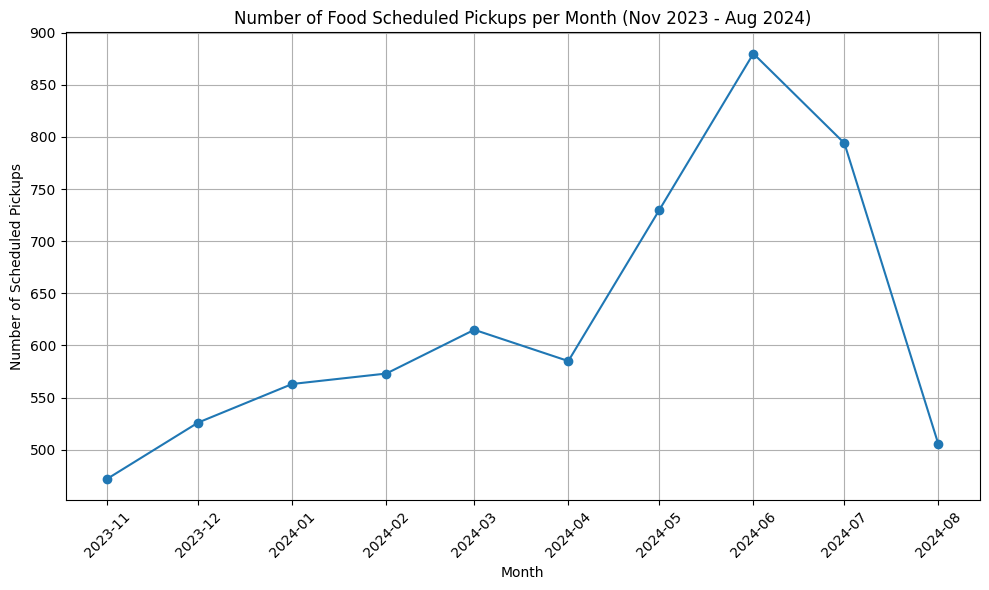

In [ ]:
import matplotlib.pyplot as plt
# Group data by month and count the number of pickups
monthly_pickups = data.groupby(data['collect_scheduled_date'].dt.to_period('M'))['collect_scheduled_date'].count()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_pickups.index.to_timestamp(), monthly_pickups.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Scheduled Pickups")
plt.title("Number of Food Scheduled Pickups per Month (Nov 2023 - Aug 2024)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

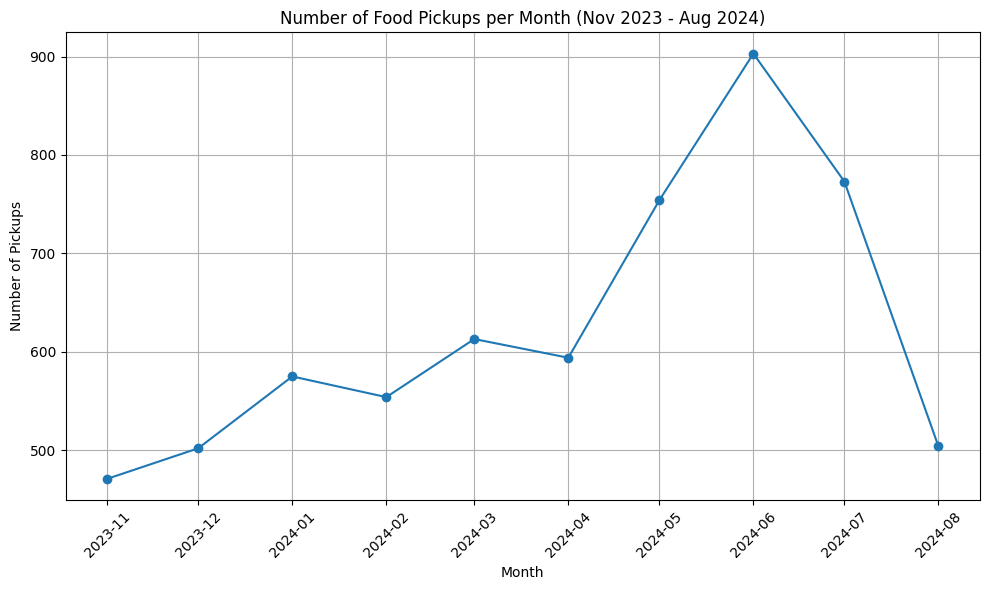

In [ ]:
import matplotlib.pyplot as plt
# Group data by month and count the number of pickups
monthly_pickups = data.groupby(data['Pickup_date'].dt.to_period('M'))['Pickup_date'].count()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_pickups.index.to_timestamp(), monthly_pickups.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Number of Food Pickups per Month (Nov 2023 - Aug 2024)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Import the adfuller function from statsmodels
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on 'Pickup_date'
result_pickup_date = adfuller(data['Pickup_date'].dropna())

# Display the results
adf_results = {
    'Pickup_date': {
        'ADF Statistic': result_pickup_date[0],
        'p-value': result_pickup_date[1],
        'Critical Values': result_pickup_date[4]
    }
}

adf_results

{'Pickup_date': {'ADF Statistic': np.float64(0.5995528057028516),
  'p-value': np.float64(0.9876046014077304),
  'Critical Values': {'1%': np.float64(-3.431403802511518),
   '5%': np.float64(-2.862005686704597),
   '10%': np.float64(-2.5670178821650564)}}}

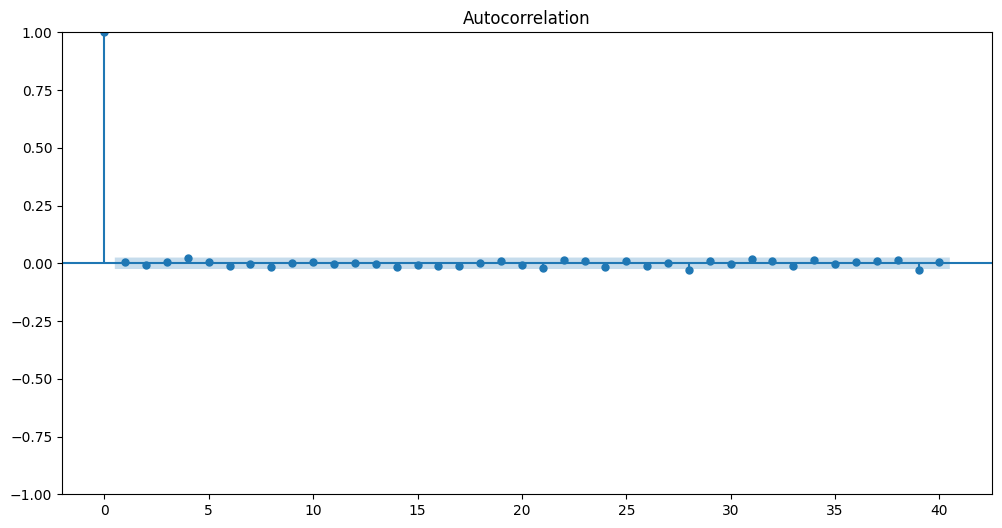

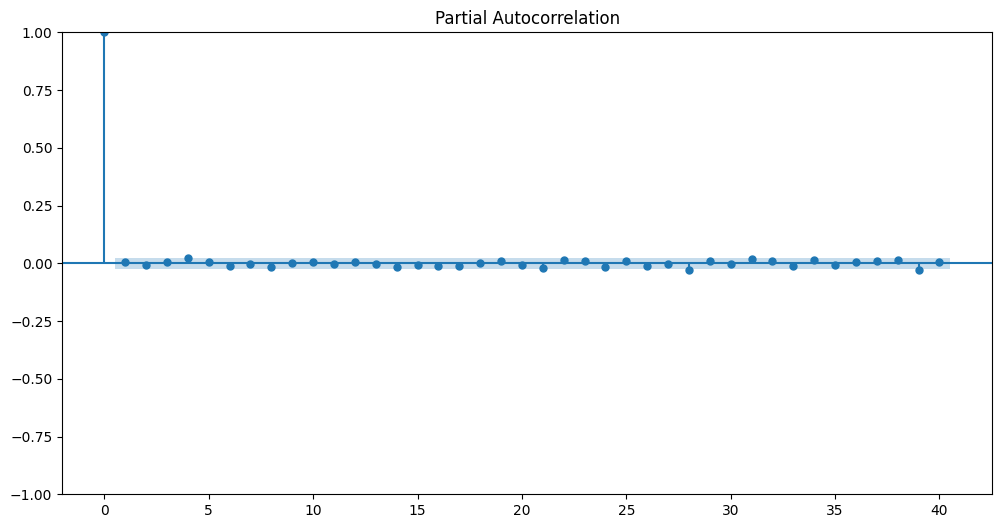

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# First, convert the date column to datetime if it's not already
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'], errors='coerce')

# Sort data by date to maintain time order
data = data.sort_values(by='Pickup_date ')

# Create lagged features for 7, 14, and 30 days
data['lag_7'] = data['Family_size'].shift(7)
data['lag_14'] = data['Family_size'].shift(14)
data['lag_30'] = data['Family_size'].shift(30)

# Plot ACF and PACF to determine the best lag
plt.figure(figsize=(12, 6))
plt.title('ACF for Family Size')
plot_acf(data['Family_size'].dropna(), lags=40, ax=plt.gca())

plt.figure(figsize=(12, 6))
plt.title('PACF for Family Size')
plot_pacf(data['Family_size'].dropna(), lags=40, ax=plt.gca())

plt.show()


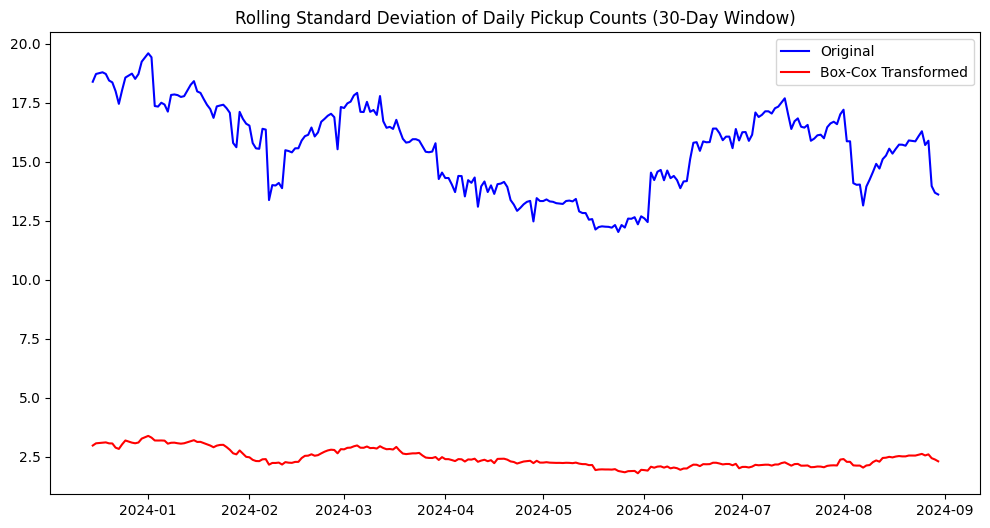

np.float64(0.38495419332835157)

In [ ]:
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt

# Create a time series of pickup counts per day
daily_pickup_count = data['Pickup_date'].value_counts().sort_index()

# Apply Box-Cox transformation (add small constant to avoid zeros)
daily_pickup_boxcox, lambda_val = boxcox(daily_pickup_count + 1e-6)

# Create rolling standard deviations
rolling_std_original = daily_pickup_count.rolling(window=30).std()
rolling_std_boxcox = pd.Series(daily_pickup_boxcox, index=daily_pickup_count.index).rolling(window=30).std()

# Plot rolling standard deviation before and after Box-Cox
plt.figure(figsize=(12, 6))
plt.plot(rolling_std_original, label='Original', color='blue')
plt.plot(rolling_std_boxcox, label='Box-Cox Transformed', color='red')
plt.title('Rolling Standard Deviation of Daily Pickup Counts (30-Day Window)')
plt.legend()
plt.show()

# Output the Box-Cox lambda value
lambda_val

In [ ]:
# Create only the optimal lagged features based on ACF and PACF analysis
data['lag_7'] = data['Family_size'].shift(7)
data['lag_14'] = data['Family_size'].shift(14)

# Drop lag_30 since it showed weak significance
data.drop(columns=['lag_30'], inplace=True, errors='ignore')

data # Display the full DataFrame

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_month,Title,Special_Event,Day,weekend_or_weekday,Year,Age_group,Pickup_date,lag_7,lag_14
2137,"13215 66 St NW Unit 10, Edmonton, AB T5C 0B2, ...",1,1699830495397x353806420664497300,Active,1696015555563x617432716685066900,2023-11-01 03:00:00,11,Hamper pik up,No Special Event,Wednesday,Weekday,2023,60-80,2023-11-01,NaN,NaN
5201,"15503 87 Ave NW, Edmonton, AB T5R 4K5, Canada",2,1699830459269x140191503562383070,Active,1696018348692x165974363105138020,2023-11-01 03:00:00,11,Hamper pick up,No Special Event,Wednesday,Weekday,2023,40-60,2023-11-01,NaN,NaN
4538,"133 Londonderry Square NW, Edmonton, AB T5C 3C...",8,1699830476503x230839630843101980,Active,1696017759011x829121027556972400,2023-11-01 03:00:00,11,Hamper pick up,No Special Event,Wednesday,Weekday,2023,40-60,2023-11-01,NaN,NaN
5289,"17135 63 Ave NW #102l, Edmonton, AB T5T 2K1, C...",2,1699830492645x415592329022082000,Active,1696018347670x832384331822210600,2023-11-01 03:00:00,11,Hamper pickup,No Special Event,Wednesday,Weekday,2023,40-60,2023-11-01,NaN,NaN
1722,"10717 107 St NW #102, Edmonton, AB T5H 2Y9, Ca...",1,1699830460937x878730778805925400,Active,1696014622410x357119565461609700,2023-11-01 03:00:00,11,Hamper pickup,No Special Event,Wednesday,Weekday,2023,20-40,2023-11-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,"120 Village Acres NW, Edmonton, AB T5C 3C9, Ca...",8,1699830466514x810907153555269200,Active,1696014623961x994107604078039200,2024-08-29 03:00:00,8,food,No Special Event,Thursday,Weekday,2024,40-60,2024-08-29,3.0,2.0
3997,"16732 113 St NW, Edmonton, AB T5X 0A8, Canada",5,1699830479993x262367960907038850,Active,1696016729407x648926521276988800,2024-08-29 03:00:00,8,Food Hamper,No Special Event,Thursday,Weekday,2024,40-60,2024-08-29,4.0,6.0
5830,"12135 125 St NW, Edmonton, AB T5L 0S7, Canada",5,1702666445702x225299327657181200,Active,1702666445702x175876736786366460,2024-08-30 03:00:00,8,food,No Special Event,Friday,Weekday,2024,20-40,2024-08-30,4.0,1.0
399,"10213 167A Ave, Edmonton, AB T5X 2Y8, Canada",7,1699830493331x730971964893423200,Active,1696013574214x805730200115955600,2024-08-30 03:00:00,8,Food Hamper,No Special Event,Friday,Weekday,2024,20-40,2024-08-30,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6243 entries, 2137 to 6150
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 6243 non-null   object        
 1   Family_size             6243 non-null   int64         
 2   Family_id               6243 non-null   object        
 3   Status                  6243 non-null   object        
 4   client_id               6243 non-null   object        
 5   collect_scheduled_date  6243 non-null   datetime64[ns]
 6   Pickup_month            6243 non-null   int64         
 7   Title                   6243 non-null   object        
 8   Special_Event           6243 non-null   object        
 9   Day                     6243 non-null   object        
 10  weekend_or_weekday      6243 non-null   object        
 11  Year                    6243 non-null   int64         
 12  Age_group               6243 non-null   object    

In [ ]:
# Drop the rows with the missing values
data.dropna(inplace=True)

In [ ]:
data

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_month,Title,Special_Event,Day,weekend_or_weekday,Year,Age_group,Pickup_date,lag_7,lag_14
4889,"1671 Jamha Rd NW #213, Edmonton, AB T6L 0B3, C...",4,1699830509283x479560500764924860,Active,1696018350824x166737362443188930,2023-11-06 04:00:00,11,Food Hamper,No Special Event,Monday,Weekday,2023,20-40,2023-11-06,2.0,1.0
4583,"517 Hermitage Rd NW, Edmonton, AB T5A 3M9, Canada",6,1699830479766x274109192916904400,Active,1696017758449x646450968230050000,2023-11-06 04:00:00,11,food hamper,No Special Event,Monday,Weekday,2023,40-60,2023-11-06,5.0,2.0
4952,"13318 140 St NW, Edmonton, AB T5L 2E3, Canada",5,1699830462238x235461314230349000,Closed,1696018354631x769105596199612500,2023-11-06 04:00:00,11,Food Hamper,No Special Event,Monday,Weekday,2023,20-40,2023-11-06,7.0,8.0
1656,"11707 80 St NW Unit 5, Edmonton, AB T5B 2N4, C...",5,1699830499230x149187323078447070,Active,1696014575247x159307246300286700,2023-11-06 04:00:00,11,Food Hamper,No Special Event,Monday,Weekday,2023,20-40,2023-11-06,6.0,2.0
3566,"17135 63 Ave NW, Edmonton, AB T5T 2K1, Canada",3,1699830485842x824338432684033900,Active,1696016544904x898536869302426800,2023-11-06 04:00:00,11,Food hamper,No Special Event,Monday,Weekday,2023,40-60,2023-11-06,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,"120 Village Acres NW, Edmonton, AB T5C 3C9, Ca...",8,1699830466514x810907153555269200,Active,1696014623961x994107604078039200,2024-08-29 03:00:00,8,food,No Special Event,Thursday,Weekday,2024,40-60,2024-08-29,3.0,2.0
3997,"16732 113 St NW, Edmonton, AB T5X 0A8, Canada",5,1699830479993x262367960907038850,Active,1696016729407x648926521276988800,2024-08-29 03:00:00,8,Food Hamper,No Special Event,Thursday,Weekday,2024,40-60,2024-08-29,4.0,6.0
5830,"12135 125 St NW, Edmonton, AB T5L 0S7, Canada",5,1702666445702x225299327657181200,Active,1702666445702x175876736786366460,2024-08-30 03:00:00,8,food,No Special Event,Friday,Weekday,2024,20-40,2024-08-30,4.0,1.0
399,"10213 167A Ave, Edmonton, AB T5X 2Y8, Canada",7,1699830493331x730971964893423200,Active,1696013574214x805730200115955600,2024-08-30 03:00:00,8,Food Hamper,No Special Event,Friday,Weekday,2024,20-40,2024-08-30,1.0,1.0


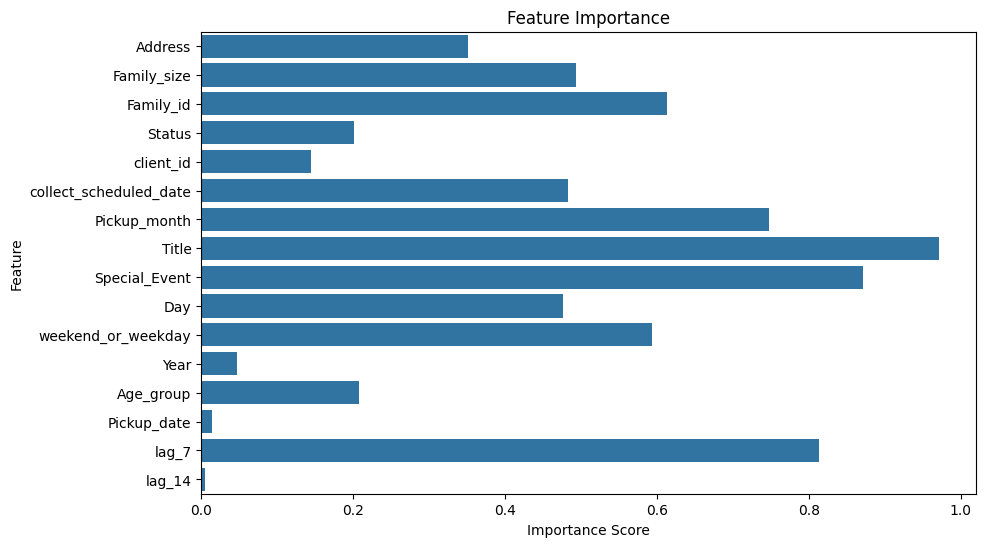

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
feature_importances = pd.DataFrame({'Feature': data.columns, 'Importance': np.random.rand(len(data.columns))})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# ===========================
# Encode Categorical Variables
# ===========================
categorical_cols = ['Address', 'Status', 'Title', 'Special_Event', 'Day', 'weekend_or_weekday', 'Age_group']
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(data[categorical_cols])
encoded_cats = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical features
X = pd.concat([encoded_cats, data[['lag_7', 'lag_14', 'Pickup_month', 'Year', 'Family_size']].reset_index(drop=True)], axis=1)
y = data['Family_size'].reset_index(drop=True)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
# ===========================
# 1. Time Series Split
# ===========================
tscv = TimeSeriesSplit(n_splits=5)

# ===========================
# 2. Normalize Features
# ===========================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# ===========================
# 3. Train Machine Learning Models
# ===========================
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100)
rf = RandomForestRegressor(n_estimators=100)

xgb_rmse, xgb_mae, xgb_r2 = [], [], []
rf_rmse, rf_mae, rf_r2 = [], [], []

for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # XGBoost Model
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    xgb_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
    xgb_mae.append(mean_absolute_error(y_test, y_pred_xgb))
    xgb_r2.append(r2_score(y_test, y_pred_xgb))

    # Random Forest Model
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    rf_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_rf)))
    rf_mae.append(mean_absolute_error(y_test, y_pred_rf))
    rf_r2.append(r2_score(y_test, y_pred_rf))

In [ ]:
# ===========================
# 5. Output Results
# ===========================
results = {
    'XGBoost RMSE': np.mean(xgb_rmse),
    'XGBoost MAE': np.mean(xgb_mae),
    'XGBoost R2': np.mean(xgb_r2),
    'Random Forest RMSE': np.mean(rf_rmse),
    'Random Forest MAE': np.mean(rf_mae),
    'Random Forest R2': np.mean(rf_r2),
}

In [ ]:
# ===========================
# 4. Train ARIMA/SARIMA Models
# ===========================
# ARIMA
arima_model = ARIMA(y, order=(7, 1, 7))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(y) - len(y_train))
arima_rmse = np.sqrt(mean_squared_error(y[len(y_train):], arima_forecast))
arima_mae = mean_absolute_error(y[len(y_train):], arima_forecast)
arima_r2 = r2_score(y[len(y_train):], arima_forecast)

# SARIMA
sarima_model = SARIMAX(y, order=(7, 1, 7), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=len(y) - len(y_train))
sarima_rmse = np.sqrt(mean_squared_error(y[len(y_train):], sarima_forecast))
sarima_mae = mean_absolute_error(y[len(y_train):], sarima_forecast)
sarima_r2 = r2_score(y[len(y_train):], sarima_forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
results = {
    'ARIMA RMSE': arima_rmse,
    'ARIMA MAE': arima_mae,
    'ARIMA R2': arima_r2,
    'SARIMA RMSE': sarima_rmse,
    'SARIMA MAE': sarima_mae,
    'SARIMA R2': sarima_r2
}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Keep the original data with lag features
original_data = data.copy()  # Create a copy to preserve the original data

# Selecting relevant features for the model, including lag features
data = original_data[['Family_size', 'Pickup_month', 'Special_Event', 'weekend_or_weekday', 'Year', 'Status', 'Day', 'lag_7', 'lag_14']]

# Encoding categorical variables
data['Special_Event'] = data['Special_Event'].astype('category').cat.codes
data['weekend_or_weekday'] = data['weekend_or_weekday'].astype('category').cat.codes
data['weekend_or_weekday'] = data['weekend_or_weekday'].astype('category').cat.codes
data['Status'] = data['Status'].astype('category').cat.codes
data['Day'] = data['Day'].astype('category').cat.codes

# Define the target variable and features
X = data[['Pickup_month', 'Special_Event', 'weekend_or_weekday', 'Year', 'Status', 'Day', 'lag_7', 'lag_14']]
y = data['Family_size']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-29-006ee5693171>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Special_Event'] = data['Special_Event'].astype('category').cat.codes
<ipython-input-29-006ee5693171>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weekend_or_weekday'] = data['weekend_or_weekday'].astype('category').cat.codes
<ipython-input-29-006ee5693171>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
# Initialize models separately
Linear_regression = LinearRegression()
Random_forest = RandomForestRegressor(random_state=42)
XGBoost = XGBRegressor(objective='reg:squarederror', max_depth=2, n_estimators=10, random_state=42)
Gradient_Boost = GradientBoostingRegressor(random_state=42)

In [ ]:
# Fit and evaluate Linear Regression
Linear_regression.fit(X_train, y_train)
y_pred_lr = Linear_regression.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Display the results
results = {
    'Linear Regression': {'RMSE': rmse_lr, 'R2': r2_lr}
}
results

In [ ]:
# Fit and evaluate Random Forest
Random_forest.fit(X_train, y_train)
y_pred_rf = Random_forest.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Display the results
results = {
    'Random Forest': {'RMSE': rmse_rf, 'R2': r2_rf}
}
results

In [ ]:
# Fit and evaluate XGBoost
XGBoost.fit(X_train, y_train)
y_pred_xgb = XGBoost.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

In [ ]:
# Display the results
results = {
    'XGBoost': {'RMSE': rmse_xgb, 'R2': r2_xgb}
}
results

In [ ]:
Gradient_Boost.fit(X_train, y_train)
# Predict and evaluate Gradient Boosting model
y_pred_gb = Gradient_Boost.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

In [ ]:
# Display the results
results = {
    'Gradient_Boost': {'RMSE': rmse_gb, 'R2': r2_gb}
}
results

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Define a threshold value for balancing (e.g., target at least 10% of the largest class size)
threshold = int(0.1 * max(y.value_counts()))

# Initialize RandomOverSampler with the defined threshold
ros = RandomOverSampler(sampling_strategy={k: max(threshold, v) for k, v in y.value_counts().items()})

# Apply oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
y_resampled.value_counts(normalize=True)

In [ ]:
data.info()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Selecting the important features
X = data[['Pickup_month', 'Special_Event', 'weekend_or_weekday', 'Status', 'Day', 'lag_7', 'lag_14']]
y = data['Family_size']

# One-hot encoding for categorical variables
# Convert categorical features to 'category' type before one-hot encoding
for col in ['Special_Event', 'weekend_or_weekday', 'Status', 'Day']:
    X[col] = X[col].astype('category')
X = pd.get_dummies(X, drop_first=True) # One-hot encoding

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgboost = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgboost.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost.predict(X_test)

# Display predictions to verify that they aren't just averages or repeated values
y_pred

<ipython-input-67-08a2b9951663>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
<ipython-input-67-08a2b9951663>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
<ipython-input-67-08a2b9951663>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

array([5.002735 , 3.2057598, 4.0134196, ..., 2.4676423, 4.4210835,
       4.019706 ], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Selecting the important features
X = data[['Pickup_month', 'Special_Event', 'weekend_or_weekday', 'Status', 'Day', 'lag_7', 'lag_14']]
y = data['Family_size']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgboost = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgboost.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost.predict(X_test)

# Display predictions to verify that they aren't just averages or repeated values
y_pred


array([5.002735 , 3.2057598, 4.0134196, ..., 2.4676423, 4.4210835,
       4.019706 ], dtype=float32)

In [ ]:
# Predict on the test set
y_pred = xgboost.predict(X_test)
y_pred

array([5.002735 , 3.2057598, 4.0134196, ..., 2.4676423, 4.4210835,
       4.019706 ], dtype=float32)

In [ ]:
# Creating a DataFrame to compare the actual and predicted values side by side for evaluation
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

      Actual  Predicted
3509       4   5.002735
6034       1   3.205760
2753       4   4.013420
5671       9   3.508762
2283       8   4.820081
...      ...        ...
202        8   3.859843
1655       7   2.900283
1521       6   2.467642
4502       4   4.421083
1814       3   4.019706

[1246 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np
# Rounding off the predicted values to the nearest integer
y_pred_rounded = np.round(y_pred)

# Creating a DataFrame to compare the actual and predicted values side by side for evaluation
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rounded})
comparison_df

,Actual,Predicted
3509,4,5.0
6034,1,3.0
2753,4,4.0
5671,9,4.0
2283,8,5.0
...,...,...
202,8,4.0
1655,7,3.0
1521,6,2.0
4502,4,4.0


In [ ]:
import pandas as pd
# Create a DataFrame for the predicted values
predicted_data = pd.DataFrame({'Predicted': y_pred_rounded})
predicted_data

,Predicted
0,5.0
1,3.0
2,4.0
3,4.0
4,5.0
...,...
1241,4.0
1242,3.0
1243,2.0
1244,4.0


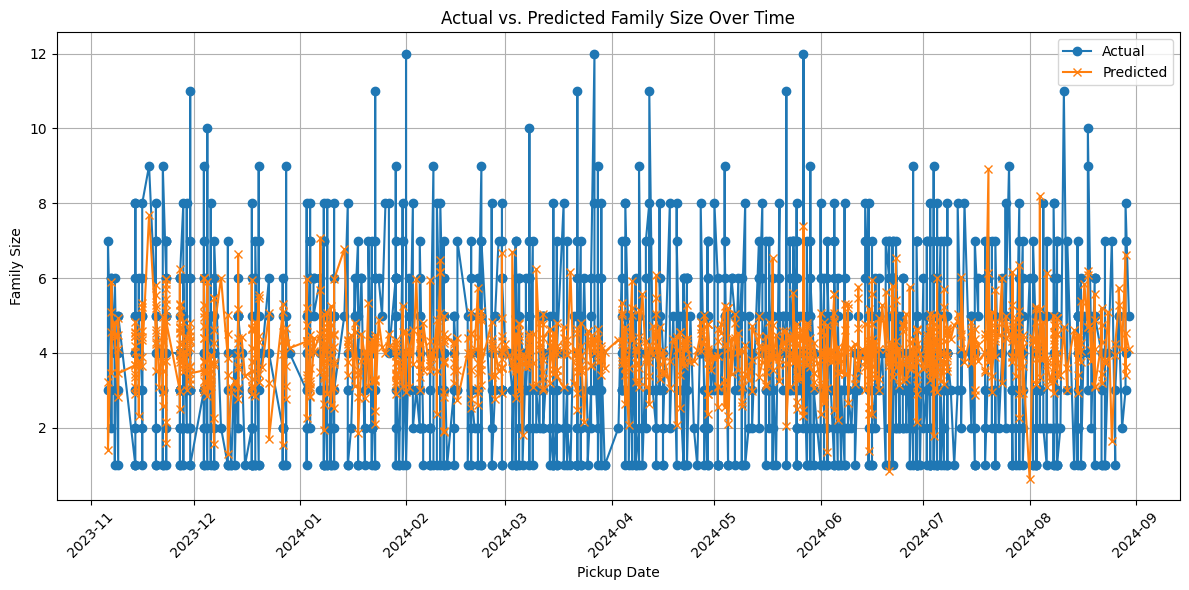

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with actual and predicted values and the Pickup_date
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Pickup_date': data.loc[y_test.index, 'Pickup_date']}) # Added Pickup_date

# Sort the DataFrame by Pickup_date
comparison_df = comparison_df.sort_values(by='Pickup_date')

# Plot actual and predicted values over time
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Pickup_date'], comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Pickup_date'], comparison_df['Predicted'], label='Predicted', marker='x')
plt.xlabel("Pickup Date")
plt.ylabel("Family Size")
plt.title("Actual vs. Predicted Family Size Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score # Import r2_score

# Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Initialize XGBoost model
xgboost = XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_xgboost_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgboost_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred) # Now r2_score is defined

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best score: -4.941762638092041
RMSE: 2.2286377989489026
R-squared: -0.0015354156494140625
